In [1]:
from keras.datasets import mnist
import numpy as np
import keras

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# y 데이터 분포 확인
print(np.unique(y_train, return_counts=True)) ## 고유원소 정렬 return_counts 고유원소 개수

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
print(x_train[0].shape)

(28, 28)


In [6]:
num = x_train[0]
for i in range(28):
    for j in range(28):
        print('{:4d}'.format(num[i][j]), end='')
    print()

print(y_train[0])

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

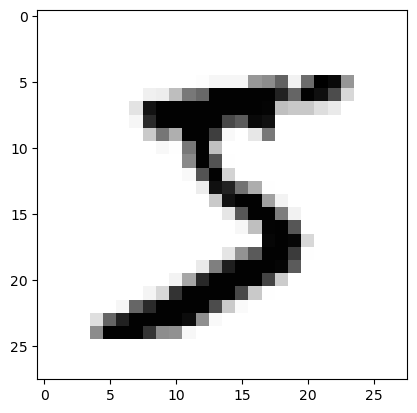

In [7]:
import matplotlib.pyplot as plt
plt.imshow(num, cmap='Greys')

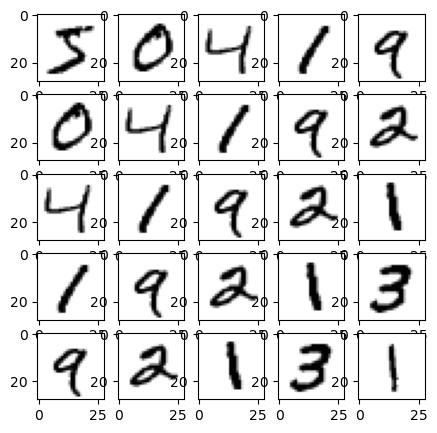

In [8]:
fig, axs = plt.subplots(5,5, figsize = (5,5))
for i in range(5):
    for j in range(5):
        axs[i,j].imshow(x_train[i+j], cmap='gray_r')
plt.show()

In [9]:
# 이미지 데이터를 cnn 입력에 맞도록 차원을 늘림 흑백 1 컬러 3(rgb)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [10]:
# 이미지 데이터 정규화 
x_train = x_train / 255
x_test = x_test / 255

In [11]:
# 범주 인코딩  : (Target(y)을 one-hot-encoding)
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_test = keras.utils.to_categorical(y_test, num_categories)

print(y_test.shape)
print(y_train.shape)

(10000, 10)
(60000, 10)


In [ ]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential

model = Sequential()
model.add(layer=Conv2D(32, (3,3), padding='same',
                       activation='relu', strides=(1,1),
                       input_shape=(28,28,1)))
model.add(layer=MaxPooling2D(pool_size=(2,2), strides=2))

model.add(layer=Conv2D(filters=64, kernel_size=(3,3), padding='same',
                       activation='relu', strides=(1,1)))
model.add(layer=MaxPooling2D(pool_size=(2,2), strides=2))

model.add(layer=Flatten())
model.add(layer=Dense(128, activation='relu'))
model.add(layer=Dense(10, activation='softmax'))
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='acc')

In [ ]:
hist = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['acc', 'val_acc'])

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("3.jpg")
print(image.shape)
plt.imshow(image)

In [ ]:
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input


image = image_utils.load_img("3.jpg", target_size=(28, 28))
print(image)

image = image_utils.img_to_array(image)
print(image.shape)

image = image.reshape(1,28,28,1)
# image = preprocess_input(image)
print(image[0].shape)

# preds = model.predict(image)

In [ ]:
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(28, 28))
    
    # image = image_utils.img_to_array(image)
    # image = image.reshape(28,28,1)
    # image = preprocess_input(image)
    # preds = model.predict(image)
    # return preds

In [ ]:
from PIL import Image
img = Image.open("3.jpg")
img = img.resize((28,28))
type(img)
img

In [ ]:
plt.imshow(img)

In [ ]:
img_data = np.array(img)
img_data.shape

In [ ]:
img_data[1].shape

In [ ]:
trans_img = img_data.transpose(2,0,1)
trans_img.shape

In [ ]:
print(trans_img[0].shape)
print(trans_img[1].shape)
print(trans_img[2].shape)

In [ ]:
np.savetxt("image.csv", trans_img[0], delimiter=',')

In [ ]:
trans_test_img = trans_img[0].reshape(28,28,1)
print(trans_test_img.shape)

num = trans_img[0].reshape(28,28)
for i in range(28):
    for j in range(28):
         print('{:3d}'.format(num[i][j]), end='')
    print()

trans_test_img = trans_img.astype('float32')/255

In [ ]:
trans_test_img = trans_img.astype('float32')/255

In [ ]:
output = model.predict(trans_test_img)
print("result :", np.argmax(output))